In [1]:
# import library tensorflow
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# check tensorflow version
print(tf.__version__)

2.2.0


In [3]:
# getting datasets
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-06-20 07:17:51--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.81MB/s    in 56s     

2020-06-20 07:18:49 (5.47 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
# extracting rockpaperscissors.zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

os.mkdir(train_dir)
os.mkdir(validation_dir)

In [5]:
# check directory datasets
os.listdir('/tmp/rockpaperscissors')

['train',
 'rock',
 'scissors',
 'paper',
 'rps-cv-images',
 'val',
 'README_rpc-cv-images.txt']

In [6]:
# import train_test_split
from sklearn.model_selection import train_test_split

# making rock directory
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.2)

# making paper directory
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.2)

# making scissors directory
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.2)

In [7]:
# making training and validation directory variables
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

# making some directory in train and val directory
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [8]:
# copying data to train and val
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [9]:
# training and test data generator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    validation_split=0.5,
                    shear_range=0.2,
                    data_format='channels_last',
                    fill_mode='nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    validation_split=0.5,
                    shear_range=0.2,
                    data_format='channels_last',
                    fill_mode='nearest')

In [10]:
# training and validation generator
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical'
        )

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical'
        )

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [11]:
# check numbers of training generator
print(train_generator.labels.size)

1749


In [12]:
# sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [13]:
# summary of the model has been created
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       1

In [14]:
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [15]:
# making training with epoch
history = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/20
25/25 - 26s - loss: 1.1092 - accuracy: 0.3720 - val_loss: 1.0963 - val_accuracy: 0.3800
Epoch 2/20
25/25 - 23s - loss: 1.0631 - accuracy: 0.5000 - val_loss: 0.9701 - val_accuracy: 0.6800
Epoch 3/20
25/25 - 23s - loss: 0.9464 - accuracy: 0.5920 - val_loss: 0.8134 - val_accuracy: 0.7200
Epoch 4/20
25/25 - 23s - loss: 0.6682 - accuracy: 0.7280 - val_loss: 0.2953 - val_accuracy: 0.8600
Epoch 5/20
25/25 - 23s - loss: 0.4896 - accuracy: 0.7952 - val_loss: 0.2160 - val_accuracy: 0.9800
Epoch 6/20
25/25 - 23s - loss: 0.3631 - accuracy: 0.8680 - val_loss: 0.2775 - val_accuracy: 0.9200
Epoch 7/20
25/25 - 23s - loss: 0.3478 - accuracy: 0.8640 - val_loss: 0.2523 - val_accuracy: 0.9200
Epoch 8/20
25/25 - 23s - loss: 0.3207 - accuracy: 0.8880 - val_loss: 0.2154 - val_accuracy: 0.9000
Epoch 9/20
25/25 - 23s - loss: 0.2878 - accuracy: 0.9040 - val_loss: 0.2510 - val_accuracy: 0.9200
Epoch 10/20
25/25 - 23s - loss: 0.2191 - accuracy: 0.9240 - val_loss: 0.1857 - val_accuracy: 0.9400
Epoch 11/

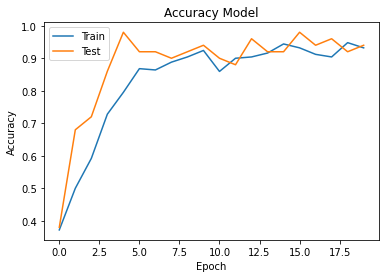

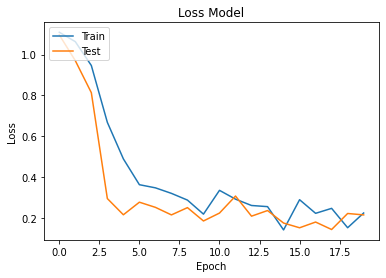

In [16]:
# visualization the result of training with epoch
import matplotlib.pyplot as pltModel

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

pltModel.plot(accuracy)
pltModel.plot(val_accuracy)
pltModel.title('Accuracy Model')
pltModel.ylabel('Accuracy')
pltModel.xlabel('Epoch')
pltModel.legend(['Train', 'Test'], loc='upper left')
pltModel.show()

pltModel.plot(loss)
pltModel.plot(val_loss)
pltModel.title('Loss Model')
pltModel.ylabel('Loss')
pltModel.xlabel('Epoch')
pltModel.legend(['Train', 'Test'], loc='upper left')
pltModel.show()

Saving 833598A3-2804-425F-B70C-3B7E30750928.jpeg to 833598A3-2804-425F-B70C-3B7E30750928.jpeg
833598A3-2804-425F-B70C-3B7E30750928.jpeg
paper


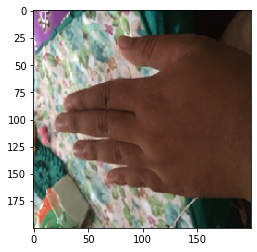

In [23]:
# image upload
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

upload = files.upload()

for fn in upload.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  result = max(classes[0])
  if classes[0,0]==result:
    print('paper')
  elif classes[0,1]==result:
    print('rock')
  else:
   print('scisorss')